> # **Introduction** 

- ## *Dataset Description*
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### The Algorithms used:
> - Logistic Regression
-XGB Classifier
-Decision Tree Classifier
-SVC
-Extra Trees Classifier

### Explanation of each column :
> - gender: "Male", "Female"
-age: age of the patient
-hypertension: 1 if the patient has hypertension, 0 otherwise
-heart_disease: 1 if the patient has any heart diseases, 0 otherwise
-ever_married: "No" or "Yes"
-work_type: "Private","Self-employed", "Govtjov" or "children"
-residence_type: "Rural" or "Urban"
-avg_glucose_level: average glucose level in blood
-bmi: body mass index
-smoking_status: "never smoked", "formerly smoked", "smokes" or "Unknown"
-stroke: 1 if the patient had a stroke, 0 otherwise



 # **More Information**
- For BMI levels:
    - below 18.5 : you're in the underweight range
    - between 18.5 and 24.9 : you're in the healthy weight range
    - between 25 and 29.9 : you're in the overweight range
    - between 30 and 39.9 : you're in the obese range
    
    
- For glucose levels:
    - A fasting blood sugar level of 99 mg/dL or lower is normal
    - 100 to 125 mg/dL indicates you have prediabetes
    - 126 mg/dL or higher indicates you have diabetes

# ***Questions for Analysis***
> - Question 1: what is the relation between stroke and features?
-Question 2: Which age category is more likely to have hypertension?
-Question 3: Which age category is more likely to have heart disease?
-Question 4: Which gender is more likely to have hypertension?
-Question 5: Which gender is more likely to have heart disease?
-Question 6: Is smoking a factor for hypertension?
-Question 7: Is smoking a factor for heart disease?
-Question 8: Does high bmi levels can be a factor for hypertension?
-Question 9: Does high bmi levels can be a factor for heart disease?
-Question 10: Is marriage a factor for hypertension?
-Question 11: Is marriage a factor for heart disease?
-Question 12: Is there a relation between bmi and age?
-Question 13: Does work type can be a factor for hypertension and heartdisease?
-Question 14: Does BMI levels have a relation with avg_glucose_levels? 


In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

### Dara Understanding

In [356]:
df = pd.read_csv('../input/brain-stroke-dataset/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [358]:
df.shape

(4981, 11)

### Statistical information 

In [359]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Missing Values

In [360]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [361]:
sum(df.duplicated())

0

### Unique values for each column 

In [362]:
for i in df.columns:
    if i == 'bmi' or i == 'age' or i == 'avg_glucose_level':
        continue
    else:print(df[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [363]:
df['gender'].value_counts(normalize = True)*100

Female    58.361775
Male      41.638225
Name: gender, dtype: float64

### Distribution for Categorical Columns

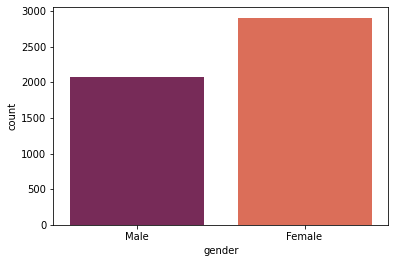

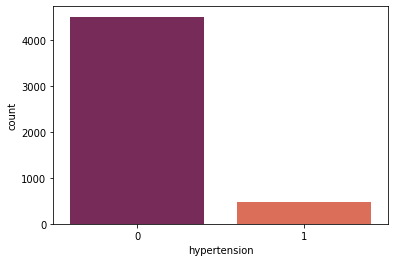

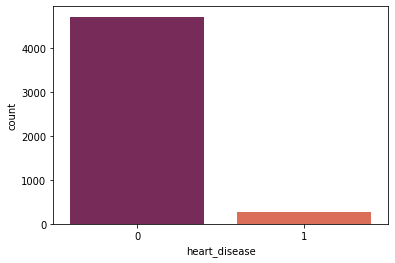

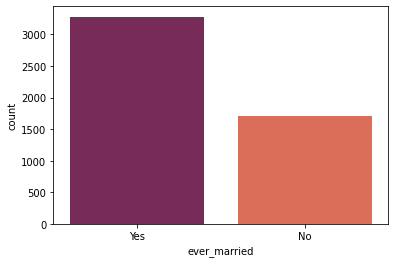

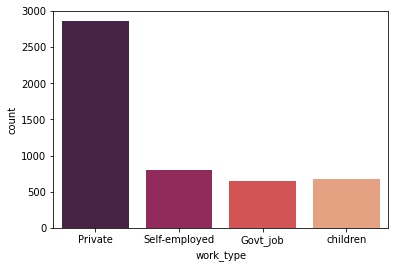

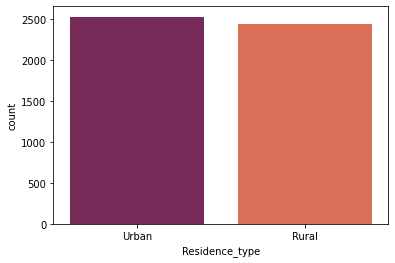

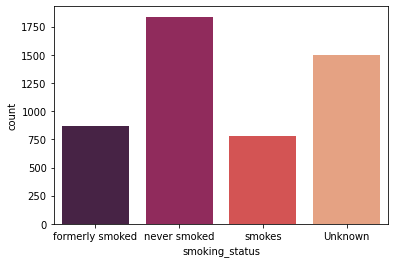

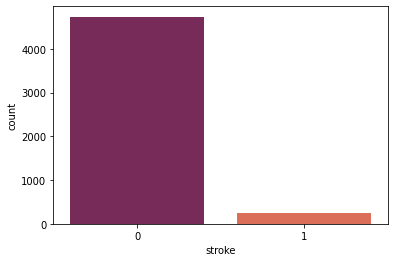

In [364]:
for i in df.columns:
    if i == 'bmi' or i == 'age' or i == 'avg_glucose_level':
        continue
    else:
        sns.countplot(data=df, x = i,palette = 'rocket')
        plt.show()

### Visualisation for the columns against stroke

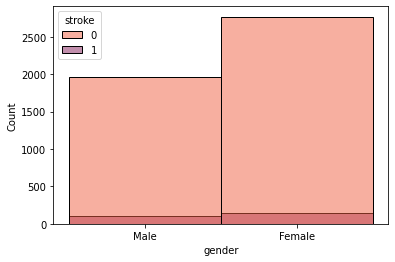

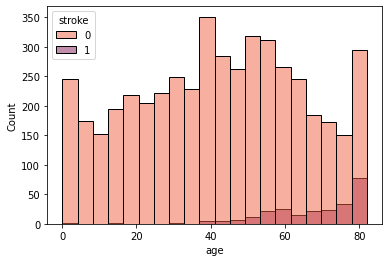

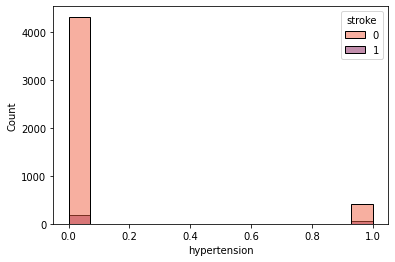

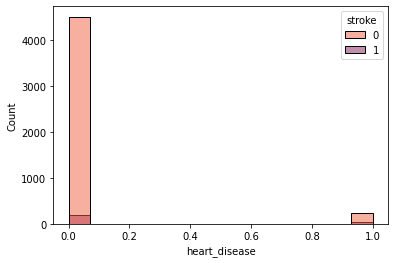

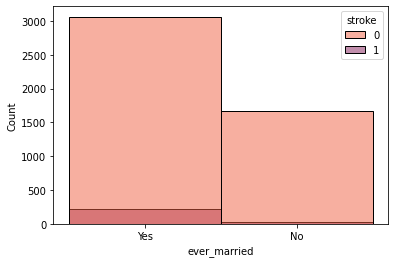

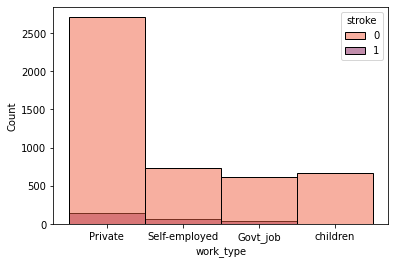

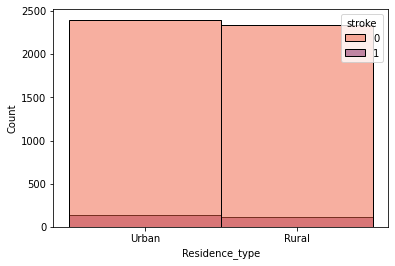

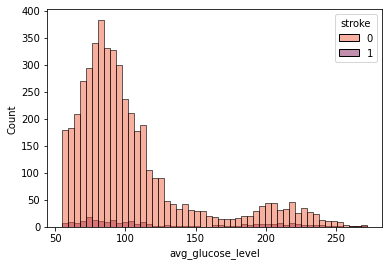

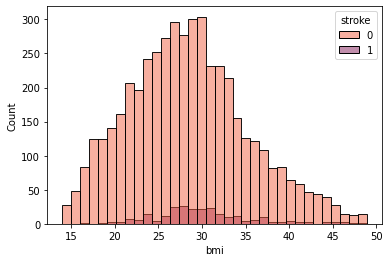

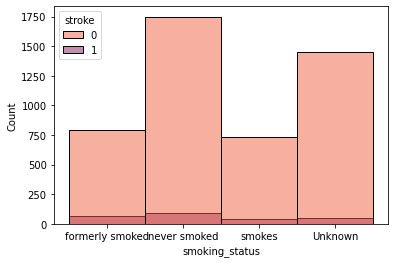

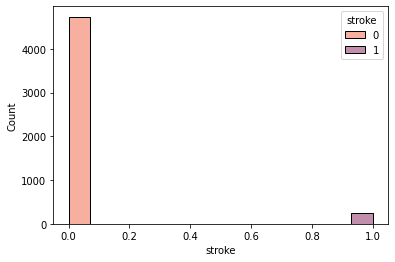

In [365]:
for i in df.columns:
    sns.histplot(data=df, x = i,hue = 'stroke',palette = 'rocket_r')
    plt.show()

We can see here :
- Females are more likely to have a stroke
- Marriage people are more likely to have a stroke
- Private work_type category are more likely to have a stroke
- "never smoked" category is more likely to have a stroke also the category that does not have hypertension and heart disease is more likely to have a stroke
- People who have aged more than 40 are more likely to have a stroke
- High levels of BMI can lead to a stroke
- People that have low levels of glucose are more likely to have a stroke

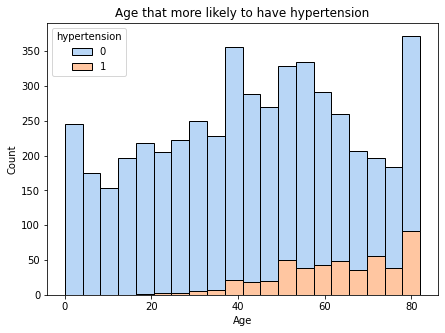

In [366]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='age', hue = 'hypertension',multiple = 'stack',palette = 'pastel')
plt.title("Age that more likely to have hypertension")
plt.xlabel("Age");

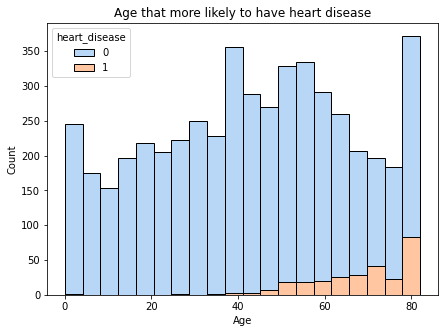

In [367]:
plt.figure(figsize=(7,5))
sns.histplot(data=df,x = 'age', hue="heart_disease",multiple = 'stack',palette = 'pastel')
plt.title("Age that more likely to have heart disease")
plt.xlabel("Age");

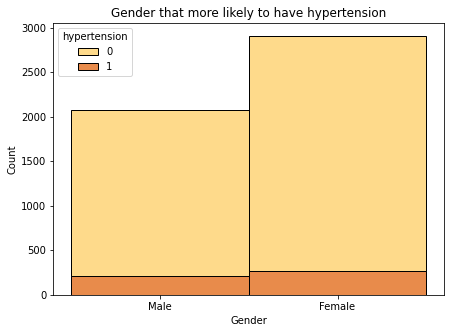

In [368]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="gender", hue="hypertension", multiple="stack", palette= 'YlOrBr')
plt.title("Gender that more likely to have hypertension")
plt.xlabel("Gender");

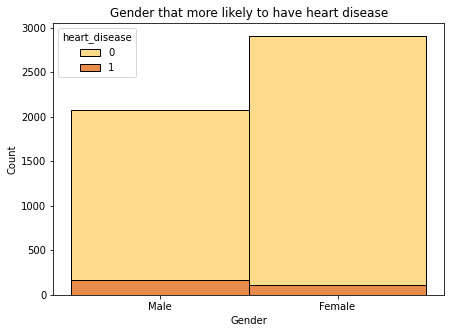

In [369]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, multiple="stack",x="gender", hue="heart_disease",palette= 'YlOrBr')
plt.title("Gender that more likely to have heart disease")
plt.xlabel("Gender");

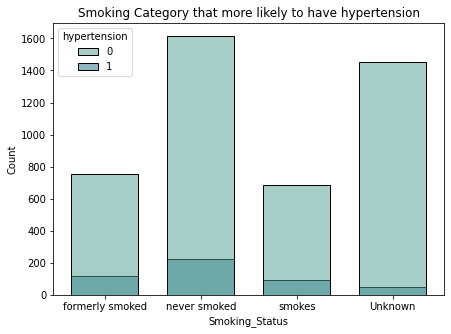

In [370]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='smoking_status',hue = 'hypertension',shrink = 0.7,palette='crest')
plt.title("Smoking Category that more likely to have hypertension")
plt.xlabel("Smoking_Status");

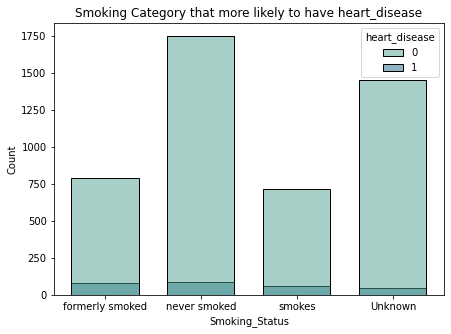

In [371]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='smoking_status',hue = 'heart_disease',shrink = 0.7,palette = 'crest')
plt.title("Smoking Category that more likely to have heart_disease")
plt.xlabel("Smoking_Status");

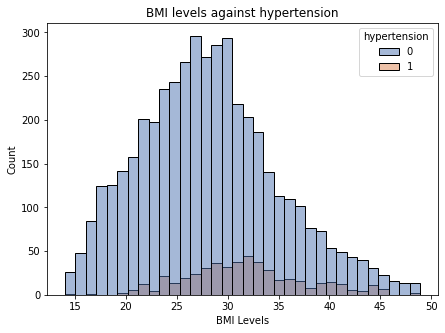

In [372]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='bmi',hue = 'hypertension',palette='deep')
plt.title("BMI levels against hypertension")
plt.xlabel("BMI Levels");

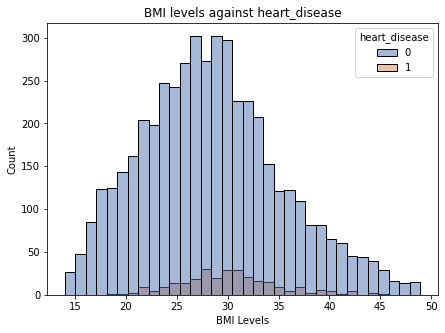

In [373]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='bmi',hue = 'heart_disease',palette='deep')
plt.title("BMI levels against heart_disease")
plt.xlabel("BMI Levels");

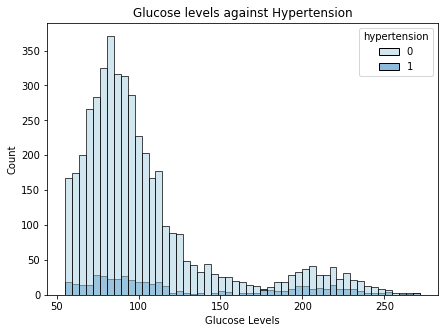

In [374]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='avg_glucose_level',hue = 'hypertension',palette='Paired')
plt.title("Glucose levels against Hypertension")
plt.xlabel("Glucose Levels");

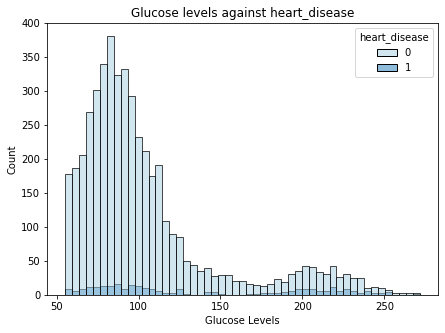

In [375]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='avg_glucose_level',hue = 'heart_disease',palette='Paired')
plt.title("Glucose levels against heart_disease")
plt.xlabel("Glucose Levels");

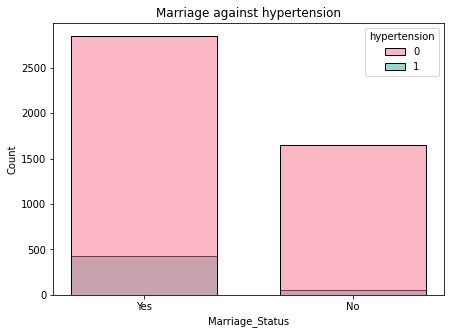

In [376]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='ever_married',hue = 'hypertension',shrink = 0.7,palette='husl')
plt.title("Marriage against hypertension")
plt.xlabel("Marriage_Status");

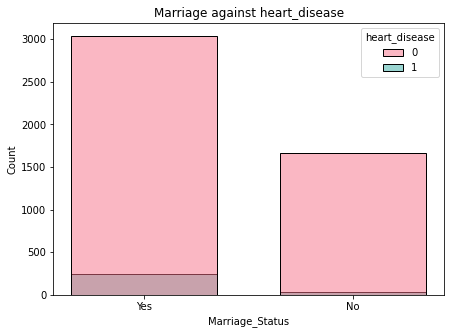

In [377]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='ever_married',hue = 'heart_disease',shrink = 0.7,palette='husl')
plt.title("Marriage against heart_disease")
plt.xlabel("Marriage_Status");

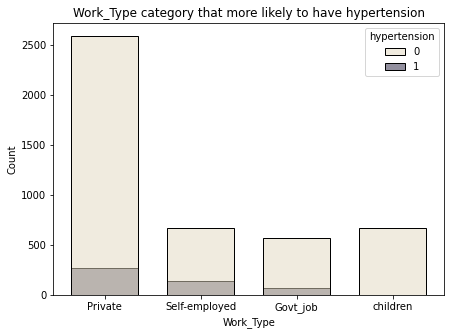

In [378]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='work_type',hue = 'hypertension',shrink = 0.7,palette='ch:s=-.2,r=.6')
plt.title("Work_Type category that more likely to have hypertension")
plt.xlabel("Work_Type");

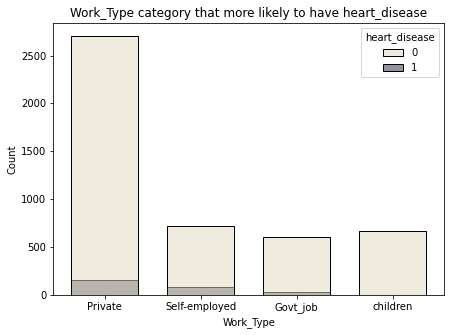

In [379]:
plt.figure(figsize=(7,5))
sns.histplot(data= df,x='work_type',hue = 'heart_disease',shrink = 0.7,palette='ch:s=-.2,r=.6')
plt.title("Work_Type category that more likely to have heart_disease")
plt.xlabel("Work_Type");

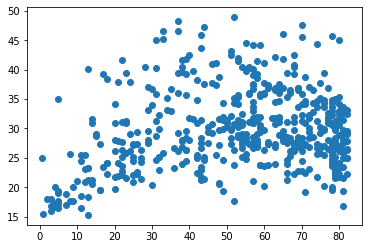

In [380]:
x = df['age']
y = df['bmi']
plt.scatter(x[:500] , y[:500]);

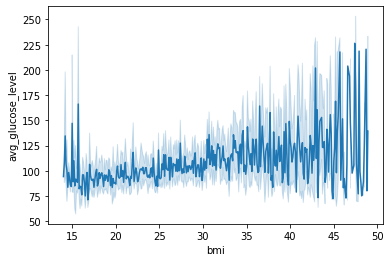

In [381]:
sns.lineplot(data = df, x = 'bmi',y = 'avg_glucose_level');

# **Conclusion**
> - Females are more likely to have hypertension and stroke but Males are more likely to have heart disease
-People who have aged more than 40 are more likely to have a stroke
-An unexpected result of smoking is that the "never smoked" category is more likely to have hypertension, heart disease, and stroke also the category that does not have hypertension and heart disease is more likely to have a stroke
-Marriage people are more likely to have hypertension, heart disease, and stroke :-)
-High levels of BMI can be a factor in hypertension, heart_disease, and stroke
-People with low and high levels of glucose both can get hypertension, heart disease, and stroke
-Getting old can cause an increase in BMI levels
-Increasing BMI levels can cause an increase of avg_glucose levels



## Data Preparation 

### Checking Outliers

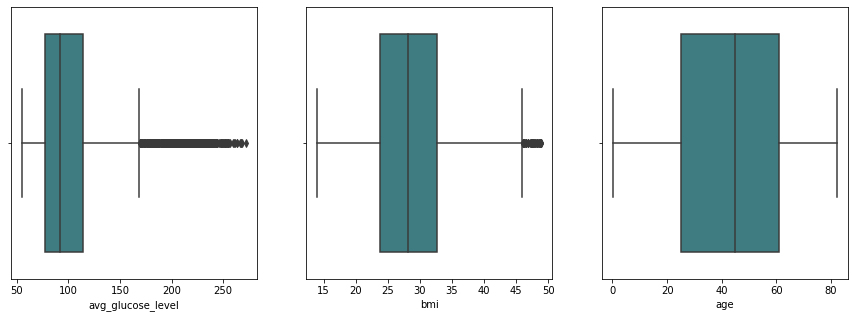

In [382]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(ax = axes[0],data = df,x='avg_glucose_level',palette = 'crest')
sns.boxplot(ax = axes[1],data = df,x='bmi',palette = 'crest')
sns.boxplot(ax = axes[2],data = df,x='age',palette = 'crest');

- The box plot shows that there are outliers for avg_glucose_levels and bmi, but these values are real data and we must take them into accounts

In [383]:
lb = LabelEncoder()

In [384]:
for i in df.columns:
    if i == 'gender' or i == 'ever_married' or i == 'work_type'\
    or i == 'Residence_type' or i == 'smoking_status':
        label = lb.fit_transform(df[i])
        df.drop(i, axis=1, inplace=True)
        df[i] = label

In [385]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1


### Feature Scaling

In [386]:
scaler = df.iloc[:, :-1]
scaler.reset_index()
normalizer = MinMaxScaler()
scaler = normalizer.fit_transform(scaler.to_numpy())
scaler = pd.DataFrame (scaler, columns = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"])
scaler.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.816895,0.0,1.0,0.801265,0.647564,1.0,1.0,1.0,0.333333,1.0
1,0.975586,0.0,1.0,0.234512,0.530086,1.0,1.0,1.0,0.333333,0.0
2,0.597168,0.0,0.0,0.536008,0.584527,1.0,0.0,1.0,0.333333,1.0
3,0.963379,1.0,0.0,0.549349,0.286533,1.0,0.0,1.0,0.666667,0.0
4,0.987793,0.0,0.0,0.605161,0.429799,1.0,1.0,1.0,0.333333,1.0


In [387]:
df.iloc[:, :-1] = scaler
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,0.816895,0.0,1.0,0.801265,0.647564,1.0,1.0,1.0,0.333333,1.0,1
1,0.975586,0.0,1.0,0.234512,0.530086,1.0,1.0,1.0,0.333333,0.0,2
2,0.597168,0.0,0.0,0.536008,0.584527,1.0,0.0,1.0,0.333333,1.0,3
3,0.963379,1.0,0.0,0.549349,0.286533,1.0,0.0,1.0,0.666667,0.0,2
4,0.987793,0.0,0.0,0.605161,0.429799,1.0,1.0,1.0,0.333333,1.0,1


### Check Correlation

<AxesSubplot:>

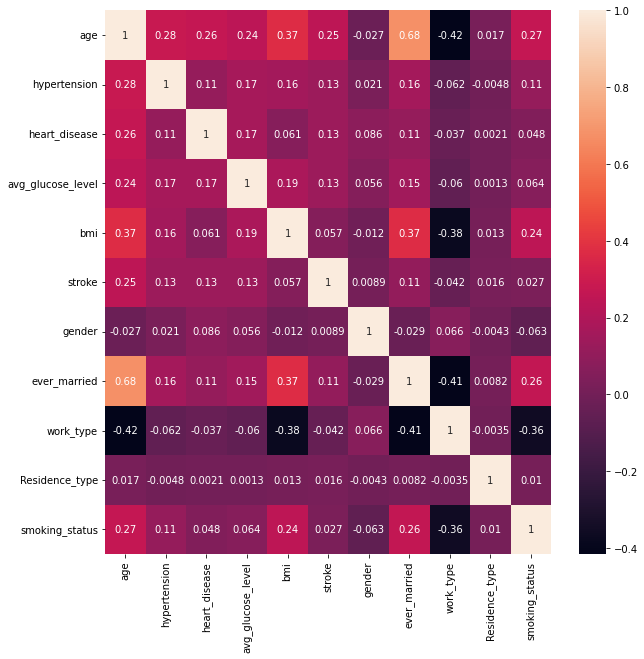

In [388]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Drop unnecessary features
    - we will take only the features that Correlated with stroke like:
        age, hypertension, heart_disease, avg_glucose_level, ever_married

In [389]:
df.drop(['bmi','gender','work_type', 'Residence_type', 'smoking_status'],axis=1,inplace=True)

In [390]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,ever_married
0,0.816895,0.0,1.0,0.801265,1.0,1.0
1,0.975586,0.0,1.0,0.234512,1.0,1.0
2,0.597168,0.0,0.0,0.536008,1.0,1.0
3,0.963379,1.0,0.0,0.549349,1.0,1.0
4,0.987793,0.0,0.0,0.605161,1.0,1.0


In [391]:
df['stroke'] = df['stroke'].astype(int)

In [392]:
x = df.drop("stroke" , axis = 1)
y = df["stroke"]
print(x.shape, y.shape)

(4981, 5) (4981,)


#### Check imbalanced classes

In [393]:
y.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

#### Oversampling to deal with imbalanced classes

In [394]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_balanced, y_balanced = oversample.fit_resample(x, y)

In [395]:
y_balanced.value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

### Data Splitting

In [396]:
X_train, X_test, Y_train , Y_test = train_test_split(x_balanced,y_balanced,\
                                                     test_size=0.2 , random_state=42)

### Logistic Regression Model

In [397]:
lr = LogisticRegression()

In [398]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [399]:
lr_train = lr.predict(X_train)
lr_acc_train = accuracy_score(Y_train, lr_train)

lr_test = lr.predict(X_test)
lr_acc_test = accuracy_score(Y_test, lr_test)
print(lr_acc_train)
print(lr_acc_test)

0.7628103539355521
0.7729672650475184


In [400]:
lr_perc = precision_score(Y_test, lr_test)
lr_rec = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)

print('Precision: ' ,lr_perc)
print('Recall: ', lr_rec)
print('F-measure: ', lr_f1)

Precision:  0.757455268389662
Recall:  0.8037974683544303
F-measure:  0.7799385875127941


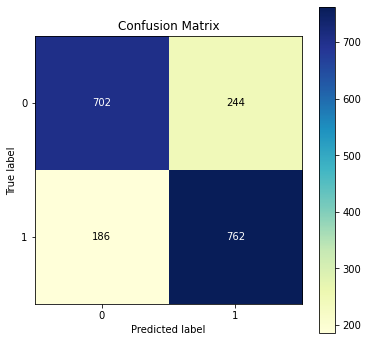

In [401]:
skplt.metrics.plot_confusion_matrix(Y_test, lr_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

In [402]:
lr_prob = lr.predict_proba(X_test)[:, 1]
lr_roc_auc_score = roc_auc_score(Y_test, lr_prob)
print('ROC AUC Score:', lr_roc_auc_score)

ROC AUC Score: 0.8492107563714864


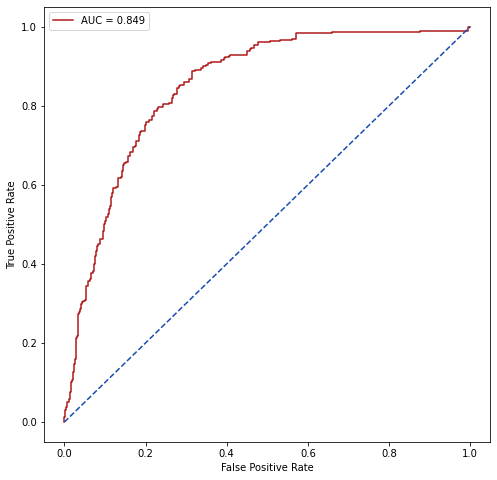

In [403]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, lr_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate, true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### XGB Classifier Model

In [404]:
xgb = XGBClassifier()

In [405]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [406]:
xgb_train = xgb.predict(X_train)
xgb_acc_train = accuracy_score(Y_train, xgb_train)

xgb_test = xgb.predict(X_test)
xgb_acc_test = accuracy_score(Y_test, xgb_test)
print(xgb_acc_train)
print(xgb_acc_test)

0.9826994189117803
0.9683210137275607


In [407]:
xgb_perc = precision_score(Y_test, xgb_test)
xgb_rec = recall_score(Y_test, xgb_test)
xgb_f1 = f1_score(Y_test, xgb_test)

print('Precision: ', xgb_perc)
print('Recall: ',  xgb_rec)
print('F-measure: ', xgb_f1)

Precision:  0.9404761904761905
Recall:  1.0
F-measure:  0.9693251533742331


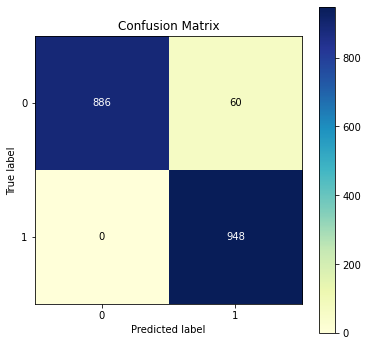

In [408]:
skplt.metrics.plot_confusion_matrix(Y_test, xgb_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

In [409]:
xgb_prob = xgb.predict_proba(X_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(Y_test, xgb_prob)
print('ROC AUC Score:', xgb_roc_auc_score)

ROC AUC Score: 0.9928814194342601


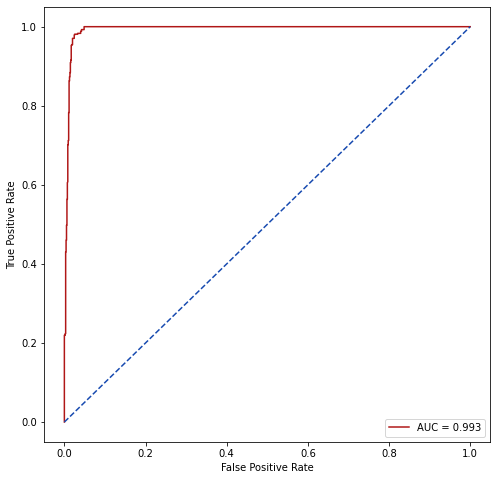

In [410]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, xgb_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Decision Tree Classifier Model

In [411]:
dt = DecisionTreeClassifier()

In [412]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [413]:
dt_train = dt.predict(X_train)
dt_acc_train = accuracy_score(Y_train, dt_train)

dt_test = dt.predict(X_test)
dt_acc_test = accuracy_score(Y_test, dt_test)
print(dt_acc_train)
print(dt_acc_test)

1.0
0.9757127771911299


In [414]:
dt_perc = precision_score(Y_test, dt_test)
dt_rec = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)

print('Precision: ', dt_perc)
print('Recall: ',  dt_rec)
print('F-measure: ', dt_f1)

Precision:  0.9537223340040242
Recall:  1.0
F-measure:  0.976313079299691


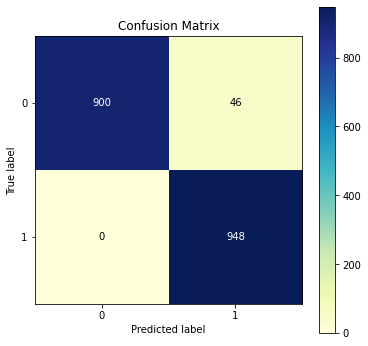

In [415]:
skplt.metrics.plot_confusion_matrix(Y_test, dt_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

In [416]:
dt_prob = dt.predict_proba(X_test)[:, 1]
dt_roc_auc_score = roc_auc_score(Y_test, dt_prob)
print('ROC AUC Score:', dt_roc_auc_score)

ROC AUC Score: 0.9756871035940804


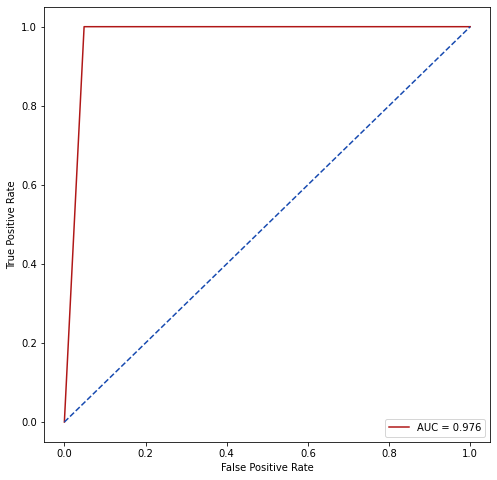

In [417]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, dt_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### SVM Model

In [418]:
svm_model = SVC(probability=True)

In [419]:
svm_model.fit(X_train,Y_train)

SVC(probability=True)

In [420]:
svm_train = svm_model.predict(X_train)
svm_acc_train = accuracy_score(Y_train, svm_train)

svm_test = svm_model.predict(X_test)
svm_acc_test = accuracy_score(Y_test, svm_test)
print(svm_acc_train)
print(svm_acc_test)

0.7740359218172214
0.7745512143611405


In [421]:
svm_perc = precision_score(Y_test, svm_test)
svm_rec = recall_score(Y_test, svm_test)
svm_f1 = f1_score(Y_test, svm_test)

print('Precision: ', svm_perc)
print('Recall: ',  svm_rec)
print('F-measure: ', svm_f1)

Precision:  0.7418755803156918
Recall:  0.8428270042194093
F-measure:  0.7891358024691358


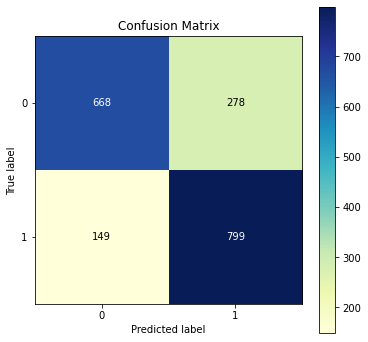

In [422]:
skplt.metrics.plot_confusion_matrix(Y_test, svm_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

In [423]:
svm_prob = svm_model.predict_proba(X_test)[:, 1]
svm_roc_auc_score = roc_auc_score(Y_test, svm_prob)
print('ROC AUC Score:', svm_roc_auc_score)

ROC AUC Score: 0.8514247196724383


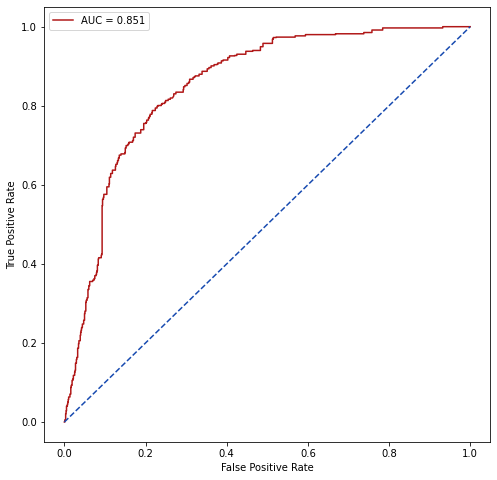

In [424]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, svm_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Extra Tress Classifier Model

In [425]:
et=ExtraTreesClassifier(n_estimators=10)

In [438]:
et.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=10)

In [439]:
et_train = et.predict(X_train)
et_acc_train = accuracy_score(Y_train, et_train)

et_test = et.predict(X_test)
et_acc_test = accuracy_score(Y_test, et_test)
print(et_acc_train)
print(et_acc_test)

1.0
0.9873284054910243


In [440]:
et_perc = precision_score(Y_test, et_test)
et_rec = recall_score(Y_test, et_test)
et_f1 = f1_score(Y_test, et_test)

print('Precision: ', et_perc)
print('Recall: ',  et_rec)
print('F-measure: ', et_f1)

Precision:  0.9753086419753086
Recall:  1.0
F-measure:  0.9875


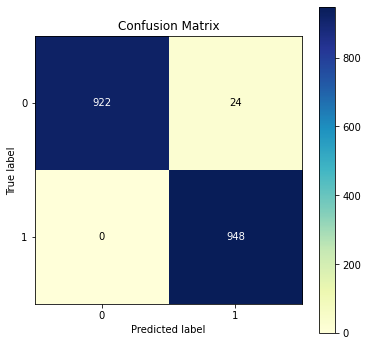

In [441]:
skplt.metrics.plot_confusion_matrix(Y_test, et_test,
                                    figsize=(6,6), cmap= 'YlGnBu');

In [442]:
et_prob = et.predict_proba(X_test)[:, 1]
et_roc_auc_score = roc_auc_score(Y_test, et_prob)
print('ROC AUC Score:', et_roc_auc_score)

ROC AUC Score: 0.9984143763213531


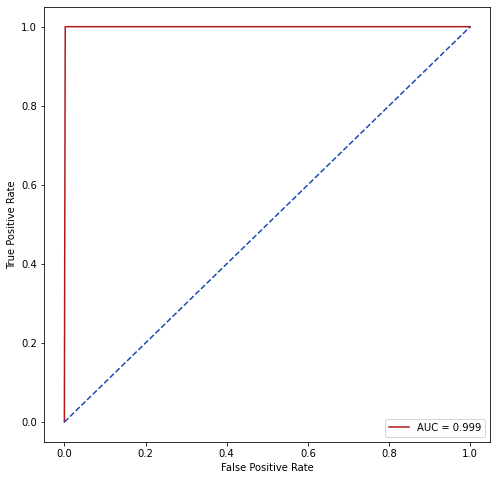

In [431]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, et_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **Conclusion**

### AUC Score of the models

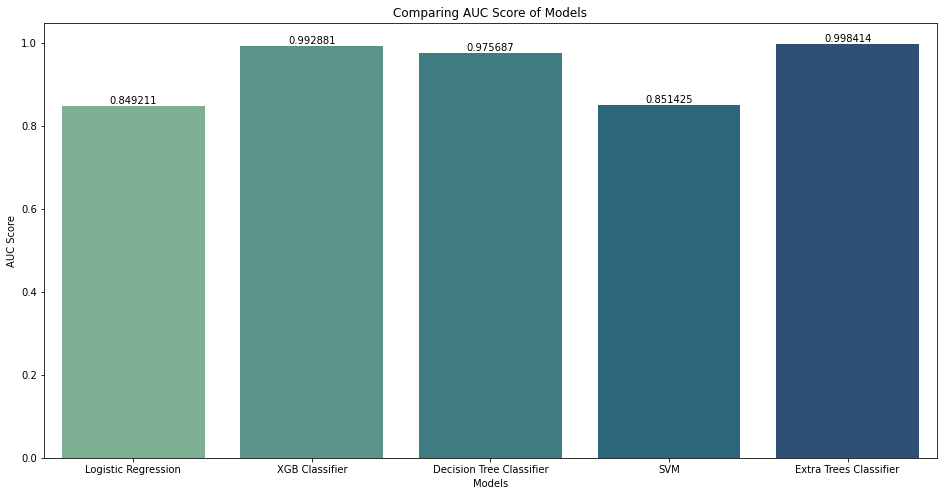

In [443]:
plt.figure(figsize = (16, 8))
models = ['Logistic Regression', 'XGB Classifier','Decision Tree Classifier',
          'SVM', 'Extra Trees Classifier' ]

auc = [lr_roc_auc_score, xgb_roc_auc_score, dt_roc_auc_score, 
       svm_roc_auc_score, et_roc_auc_score]

ax = sns.barplot(x = models, y = auc, palette='crest')
ax.bar_label(ax.containers[0])

plt.title('Comparing AUC Score of Models')
plt.xlabel('Models')
plt.ylabel('AUC Score');

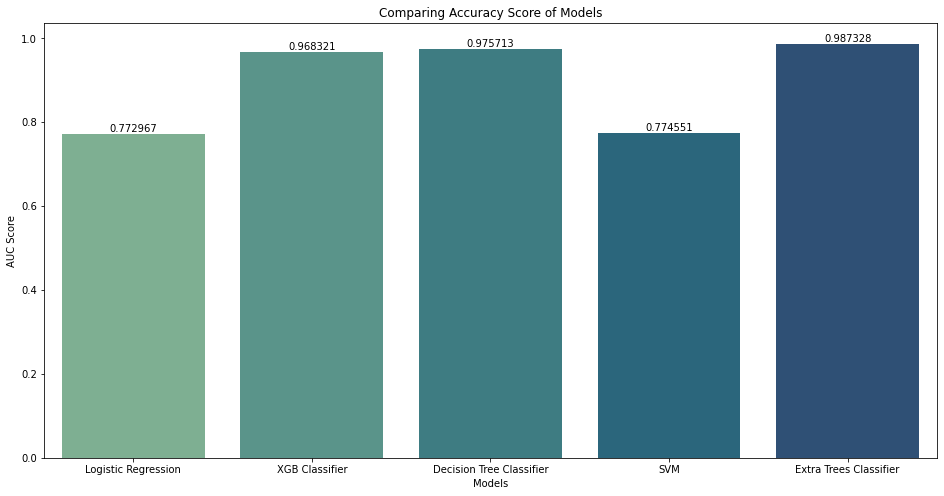

In [444]:
plt.figure(figsize = (16, 8))
models = ['Logistic Regression', 'XGB Classifier','Decision Tree Classifier',
          'SVM', 'Extra Trees Classifier' ]

auc = [lr_acc_test, xgb_acc_test, dt_acc_test, 
       svm_acc_test, et_acc_test]

ax = sns.barplot(x = models, y = auc, palette='crest')
ax.bar_label(ax.containers[0])

plt.title('Comparing Accuracy Score of Models')
plt.xlabel('Models')
plt.ylabel('AUC Score');

As we can see here: 
- **Extra Trees Classifier Model** performs the best with **0.998 AUC** score and **98.7% accuracy**

#### *The model does not misclassify any Stroke patient as a Non-Stroke patient, which is fascinating. We don't want any patient who is suffering from a stroke to be categorized as having a non-stroke and so not receive the necessary medical care.*

### *****Thank you, your feedback is highly appreciated.*****